# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<br>● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
<br>● ‘Neighborhood’ indicates the location of the hospital.
<br>● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
<br>● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
1.How many percent of patients missed their scheduled appointment?<br>
2.What is the gender distribution for show / no-show patients?<br>
3.Are there patients with more than one appointment? If yes, what are the top 10 patients with most appointments?<br>
4.what are the relationship between 'Age' and attend the appointment??<br>


### Importing the libraries that we will use

In [107]:
#import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Here we will check for cleanliness, and then trim and clean our dataset for analysis. 

In [108]:
# Load the dataset 
df = pd.read_csv('noshowappointments.csv')

### Show the first 5 rows of the data and it's shape

In [109]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [110]:
df.shape

(110527, 14)

### Show some summary Statistics about the dataset

In [111]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [112]:
# checking the info of the data (data types, null values etc..)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [113]:
#Checking for null values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### Data Cleaning
>Fixing typos in the columns
 

In [114]:
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
#print the columns in the dataset
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [115]:
#let's take a look at the data
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Here are some initial observations:
1.There are 13 independent variables and one dependent (no_show) in the dataset.<br>
2.The dataset does not contain any missing values (NaNs).<br>
3.The patient_id data type is float but should be int.<br>
4.The scheduled_day and appointment_day columns type should be changed to datetime.<br>
5.The appointment_day has no hour specified (it equals to 00:00:00). We will not be able to analyze if the appointment hour has anything to do with no shows.<br>
6.There could be interesting to know how much time passed between a visit scheduling time and the actual visit time. There is no such data column but this can be calculated from scheduled_day and appointment_day columns.<br>

### Observation 3:
The patient_id data type is float but should be int

In [119]:
#Check how many patients_ids are not integers using lambda expression
non_int_patient_ids=df[~df.patient_id.apply(lambda x:x.is_integer())]
print('There are {} patients_ids that are not integers'.format(len(non_int_patient_ids)))
non_int_patient_ids

There are 3545 patients_ids that are not integers


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed,not_showed
59,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,False,False
63,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,False,False
64,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,False,False
65,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,False,False
67,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,False,False
110346,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,False,False
110454,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,False,False
110460,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,False,False


In [120]:
# Convert patient_id from float to int
df['patient_id'] = df['patient_id'].astype('int64')

# Check if the patient_id is int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  int64  
 1   appointment_id   110527 non-null  float64
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  float64
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  float64
 8   hypertension     110527 non-null  float64
 9   diabetes         110527 non-null  float64
 10  alcoholism       110527 non-null  float64
 11  handicap         110527 non-null  float64
 12  sms_received     110527 non-null  float64
 13  no_show          110527 non-null  float64
 14  showed           110527 non-null  bool   
 15  not_showed       110527 non-null  bool   
dtypes: bool(2), float64(9), int64(1), obje

### Observation 4: 
The scheduled_day and appointment_day columns type should be changed to datetime

In [121]:
df['scheduled_day']=pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day']=pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')
# Check if the type is now datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   appointment_id   110527 non-null  float64       
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  float64       
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  float64       
 8   hypertension     110527 non-null  float64       
 9   diabetes         110527 non-null  float64       
 10  alcoholism       110527 non-null  float64       
 11  handicap         110527 non-null  float64       
 12  sms_received     110527 non-null  float64       
 13  no_show          110527 non-null  float64       
 14  showed           110

### Observation 6:
Create a new column waiting_time_days

In [122]:
#Create waiting_time_days column
df['waiting_time_days']=(df.appointment_day -df.scheduled_day).dt.days
# Check if the column exists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   patient_id         110527 non-null  int64         
 1   appointment_id     110527 non-null  float64       
 2   gender             110527 non-null  object        
 3   scheduled_day      110527 non-null  datetime64[ns]
 4   appointment_day    110527 non-null  datetime64[ns]
 5   age                110527 non-null  float64       
 6   neighbourhood      110527 non-null  object        
 7   scholarship        110527 non-null  float64       
 8   hypertension       110527 non-null  float64       
 9   diabetes           110527 non-null  float64       
 10  alcoholism         110527 non-null  float64       
 11  handicap           110527 non-null  float64       
 12  sms_received       110527 non-null  float64       
 13  no_show            110527 non-null  float64 

In [123]:
# let's take a look at some statistics
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time_days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.425642e+14,5.493660e+06,38.276780,1.285691,1.385142,1.259761,1.218296,1.210135,1.500806,1.384047,9.841098
std,2.530289e+14,1.001764e+06,22.104561,6.519426,6.506669,6.522499,6.527195,6.528421,6.489885,6.506818,15.123403
min,3.700000e+01,3.708887e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,3.251883e+12,5.636216e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.697449e+13,5.678212e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.231455e+13,5.723640e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,179.000000


### Additional observations
1.age: The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55. There is a data range problem in the dataset. The age value cannot be below 0, and there are some very old people as well. To be investigated.<br>
2.handicap: is represented by 4 classes as opposed to other categorical variables in this dataset. This can be a result of an error or there are 4 categories used.<br>
3.sms_received: 75% of patients received sms regarding an appointment.<br>
4.waiting_time_days: 10 days on average patients waited for an appointment. 50% of patients waited up to 4 days and 75% up to 15 days for an appointment. The longest awaiting time was 179 days. There is at least one case where a visit happened 6 days before it was scheduled. This should not happen and will be further investigated.

array([[<AxesSubplot:title={'center':'patient_id'}>,
        <AxesSubplot:title={'center':'appointment_id'}>,
        <AxesSubplot:title={'center':'scheduled_day'}>,
        <AxesSubplot:title={'center':'appointment_day'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handicap'}>,
        <AxesSubplot:title={'center':'sms_received'}>,
        <AxesSubplot:title={'center':'no_show'}>],
       [<AxesSubplot:title={'center':'waiting_time_days'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

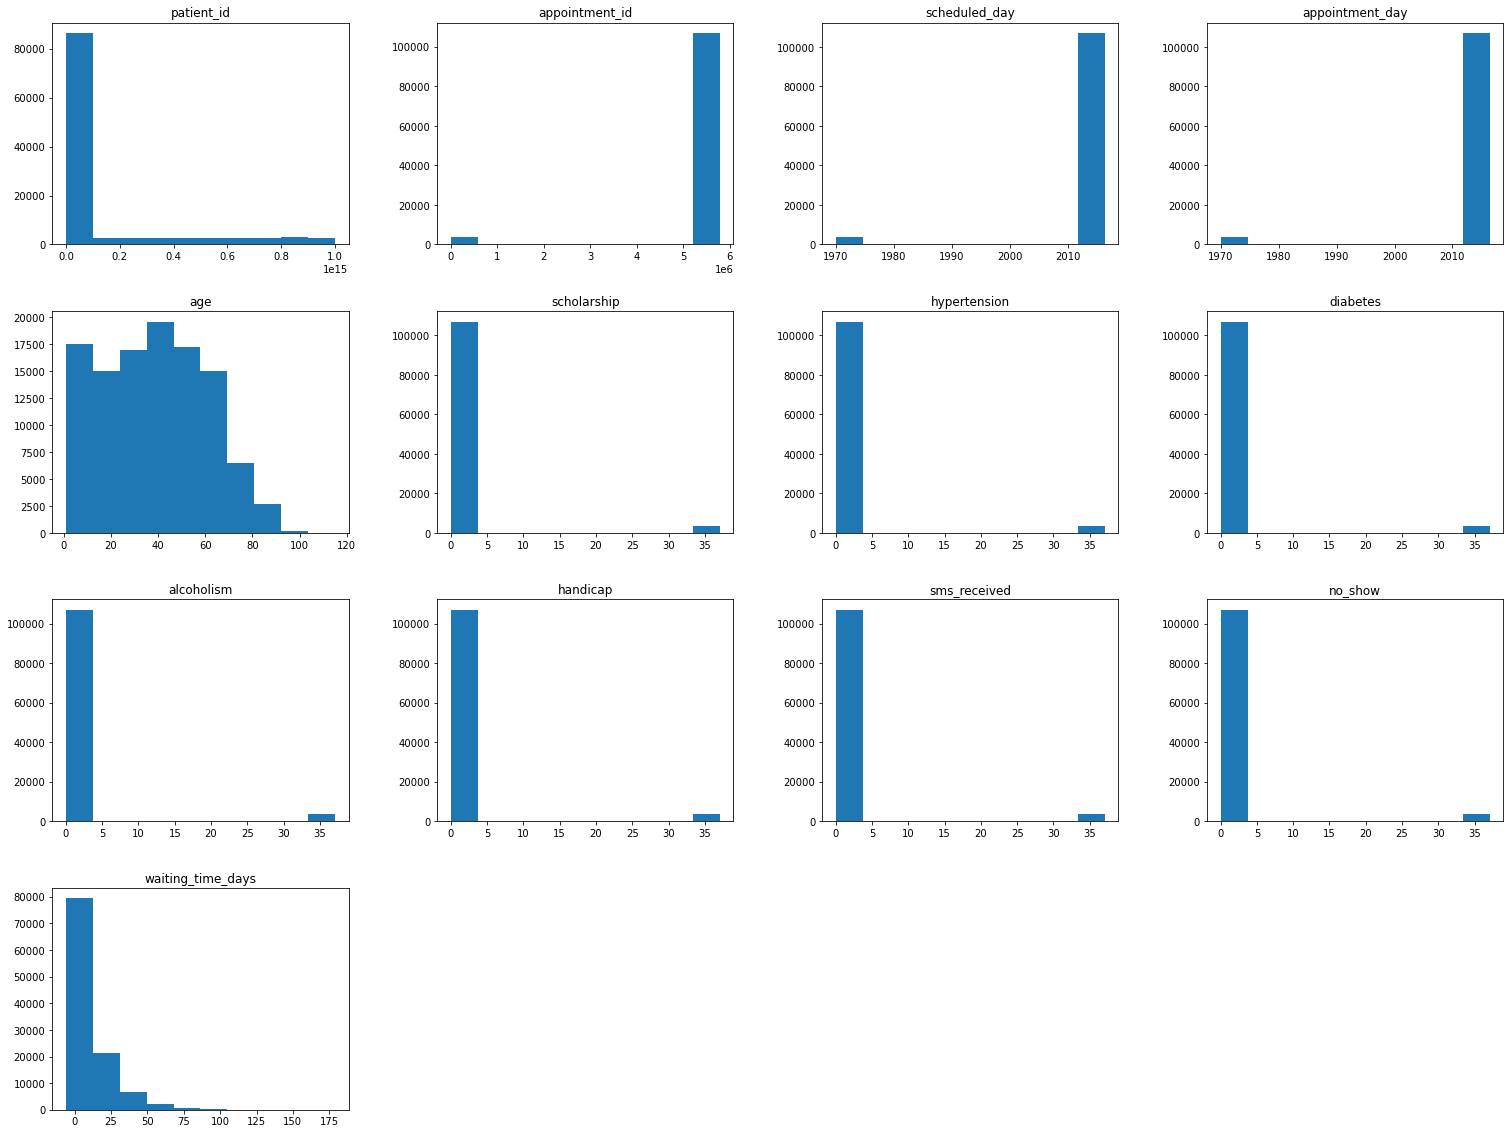

In [124]:
#show a histgram of each column
df.hist(grid=False,figsize=(26,20))

### Histogram observations
1.age: There are many very young people in the dataset but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.<br>
2.alcoholism: Most of the patients are not alcoholics.<br>
3.diabetes: Most of the patients are not diabetes but more than alcoholics.<br>
4.handicap: There are for handicap categories with most of the people not being handicapted.<br>
5.hypertension: Most patients do not have hypertension diagnosed.

### gender

In [20]:
#Print Unique Values
print("Unique Values in `gender` => {}".format(df.gender.unique()))

Unique Values in `gender` => ['F' 'M']


### scheduled_day

In [21]:
#Print Unique Values
print("Unique Values in `scheduled_day` => {}".format(df.scheduled_day.unique()))

Unique Values in `scheduled_day` => ['2016-04-29T00:00:00.000000000' '2016-04-27T00:00:00.000000000'
 '2016-04-26T00:00:00.000000000' '2016-04-28T00:00:00.000000000'
 '2016-04-25T00:00:00.000000000' '2016-04-20T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2016-04-19T00:00:00.000000000'
 '2016-04-06T00:00:00.000000000' '2016-04-18T00:00:00.000000000'
 '2016-04-11T00:00:00.000000000' '2016-04-12T00:00:00.000000000'
 '2016-04-15T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2016-04-05T00:00:00.000000000' '2016-04-08T00:00:00.000000000'
 '2016-04-14T00:00:00.000000000' '2016-04-13T00:00:00.000000000'
 '2016-04-07T00:00:00.000000000' '2016-03-17T00:00:00.000000000'
 '2016-03-30T00:00:00.000000000' '2016-03-29T00:00:00.000000000'
 '2016-03-18T00:00:00.000000000' '2016-03-28T00:00:00.000000000'
 '2016-03-04T00:00:00.000000000' '2016-03-15T00:00:00.000000000'
 '2016-03-14T00:00:00.000000000' '2016-03-21T00:00:00.000000000'
 '2016-03-23T00:00:00.000000000' '2016-03-22T00:00:00.

### appointment_day

In [23]:
#Print Unique Values
print("Unique Values in `appointment_day` => {}".format(df.appointment_day.unique()))

Unique Values in `appointment_day` => ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-05-25T00:00:00.000000000'
 '2016-05-11T00:00:00.000000000' '2016-05-18T00:00:00.000000000'
 '2016-05-14T00:00:00.000000000' '2016-06-02T00:00:00.000000000'
 '2016-06-03T00:00:00.000000000' '2016-06-06T00:00:00.000000000'
 '2016-06-07T00:00:00.000000000' '2016-06-01T00:00:00.000000000'
 '2016-06-08T00:00:00.000000000']


### age
Age value cannot be less than 0. I will remove all records with such values.

In [24]:
#Print Unique Values
print("Unique Values in `age` => {}".format(df.age.unique()))

df=df[(df.age>=0)&(df.age<=100)]
df.age.value_counts()

Unique Values in `age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
96       17
97       11
98        6
100       4
99        1
Name: age, Length: 101, dtype: int64

Text(0.5, 1.0, 'showing age values distribution')

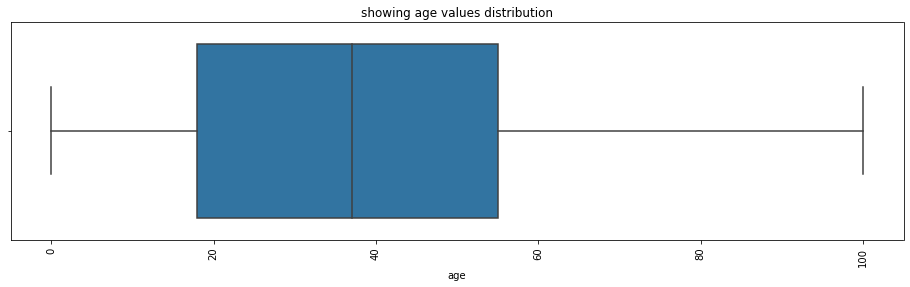

In [25]:
# Let's see a boxplot showing what is age values distribution
plt.figure(figsize=(16,4))

plt.xticks(rotation=90)
ax=sns.boxplot(x=df.age)
ax.set_title('showing age values distribution')

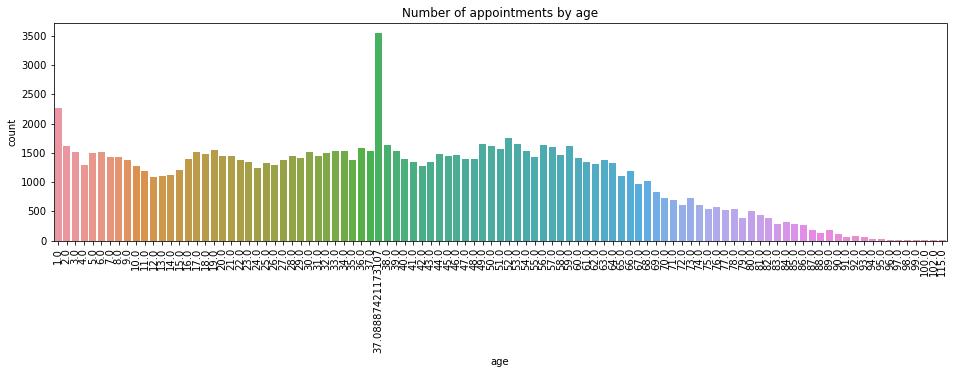

In [131]:
#Let's see how many there are patients of each age
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax=sns.countplot(x=df.age)
ax.set_title("Number of appointments by age")
plt.show()

##### The above histogram shows a peak for the infants (patients of age 0). For higher age values the distribution starts to be uniform. After the age value of around 60 we see a right-skewed distribution.

### scholarship

In [28]:
#Print Unique Values
print("Unique Values in `scholarship` => {}".format(df.scholarship.unique()))

Unique Values in `scholarship` => [0 1]


### hypertension

In [29]:
#Print Unique Values
print("Unique Values in `hypertension` => {}".format(df.hypertension.unique()))

Unique Values in `hypertension` => [1 0]


### diabetes

In [30]:
#Print Unique Values
print("Unique Values in `diabetes` => {}".format(df.diabetes.unique()))

Unique Values in `diabetes` => [0 1]


### alcoholism

In [31]:
#Print Unique Values
print("Unique Values in `alcoholism` => {}".format(df.alcoholism.unique()))

Unique Values in `alcoholism` => [0 1]


### handicap

In [32]:
#Print Unique Values
print("Unique Values in `handicap` => {}".format(df.handicap.unique()))

Unique Values in `handicap` => [0 1 2 3 4]


In [33]:
# The handicap column contains 4 numeric values
df.handicap.value_counts()

0    108282
1      2038
2       183
3        13
4         3
Name: handicap, dtype: int64

### sms_received

In [34]:
# Print Unique Values
print("Unique Values in `sms_received` => {}".format(df.sms_received.unique()))

Unique Values in `sms_received` => [0 1]


### waiting_time_days

In [35]:
#Print Unique Values
print("Unique Values in `awaiting_time_days` => {}".format(df.waiting_time_days.unique()))

Unique Values in `awaiting_time_days` => [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  -1  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 126 127
 111 119  74  71  82 108 110 102 122 101 105  92  97  93 107  95  -6 139
 132 179 117 146 123]


### Let's see it visual

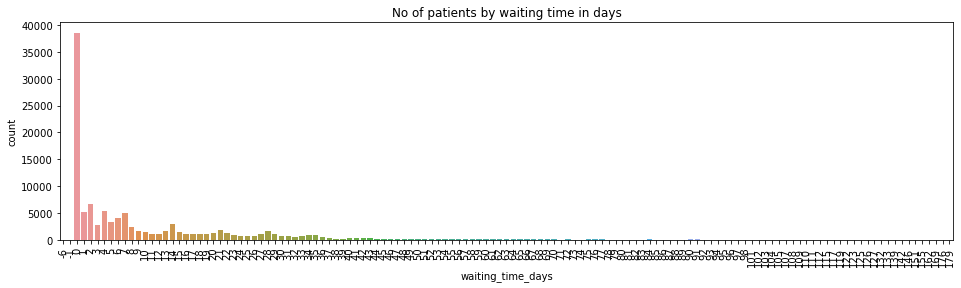

In [36]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.waiting_time_days,)
ax.set_title("No of patients by waiting time in days")
plt.show()

In [37]:
#Return number of patients with awaiting_time_days == 0
awaiting0 = df[(df.waiting_time_days == 0)].waiting_time_days.value_counts()
awaiting0

0    38560
Name: waiting_time_days, dtype: int64

##### It is worth to notice that almost 39k patients scheduled their visit for the same day.

### scheduled_day

Scheduling visits started on: 2015-11-10 00:00:00.
Scheduling visits ended on: 2016-06-08 00:00:00.


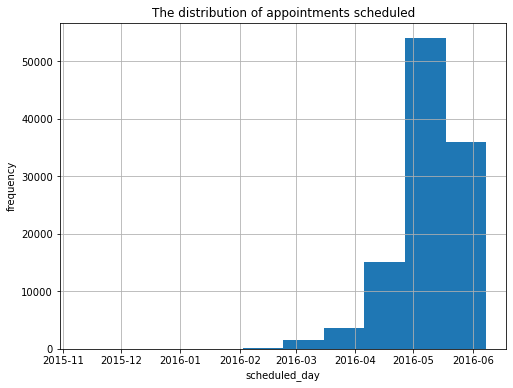

In [43]:
print('Scheduling visits started on: {}.'.format(df['scheduled_day'].min()))
print('Scheduling visits ended on: {}.'.format(df['scheduled_day'].max()))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('The distribution of appointments scheduled')
ax.set_xlabel('scheduled_day')
ax.set_ylabel('frequency')
df['scheduled_day'].hist();

##### The distribution of appointments scheduled is left skewed. Most of the schedules were made between April and June of 2016.

### appointment_day

Visit appointments started on: 2016-04-29 00:00:00.
Visit appointments ended on: 2016-06-08 00:00:00.


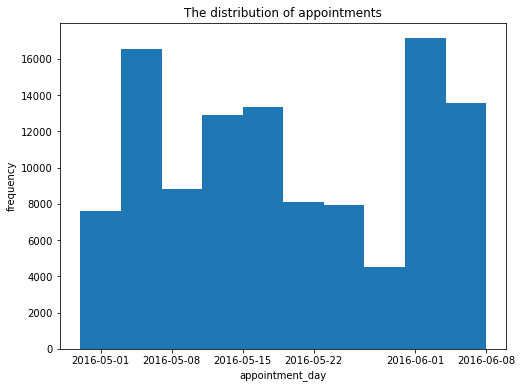

In [42]:
print('Visit appointments started on: {}.'.format(df['appointment_day'].min()))
print('Visit appointments ended on: {}.'.format(df['appointment_day'].max()))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title('The distribution of appointments')
ax.set_xlabel('appointment_day')
ax.set_ylabel('frequency')
df['appointment_day'].hist(grid=False, ax=ax);

### appointment_id
Are the appointments ids unique?<br>
If yes, then num_unique_id will be equal to number of all records in our dataset

In [44]:
num_unique_id = len(df.appointment_id.unique())
all_dataset_rec_number = df.shape[0]
print('{} == {}'.format(num_unique_id, all_dataset_rec_number))

110519 == 110519


<a id='eda'></a>
## Exploratory Data Analysis


### 1. How many percent of patients missed their scheduled appointment?

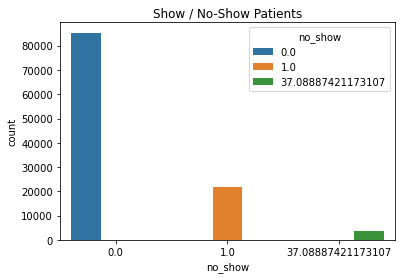

0% of appointments were missed.


In [132]:
all_appointments = df.shape[0]
missed_appointments = len(df.query("no_show == 'Yes'"))
missed_ratio = int(round(missed_appointments/all_appointments*100))

ax = sns.countplot(x=df.no_show,hue='no_show' ,data=df)
ax.set_title("Show / No-Show Patients")
plt.show();

print('{}% of appointments were missed.'.format(missed_ratio))

### 2. What is the gender distribution for show / no-show patients?

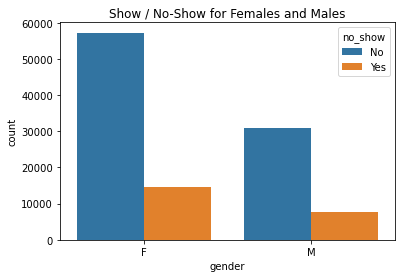

Out of 71832 appointments made by females, 14591 were missed with the ratio of 20%.
Out of 38687 appointments made by males, 7725 were missed with the ratio of 20%.


In [59]:
all_appointments_by_f = len(df.loc[df['gender'] == "F"])
all_appointments_by_m = len(df.loc[df['gender'] == "M"])

missed_appointments_by_f = len(df.query('no_show == "Yes" and gender == "F"'))
missed_appointments_by_m = len(df.loc[(df['gender'] == "M") & (df['no_show'] == "Yes")])

missed_ratio_f = int(round(missed_appointments_by_f/all_appointments_by_f*100))
missed_ratio_m = int(round(missed_appointments_by_m/all_appointments_by_m*100))

ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

print('Out of {} appointments made by females, {} were missed with the ratio of {}%.'.format(all_appointments_by_f, missed_appointments_by_f, missed_ratio_f))
print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'.format(all_appointments_by_m, missed_appointments_by_m, missed_ratio_m))

### 3. Are there patients with more than one appointment? If yes, what are the top 10 patients with most appointments?

In [60]:
df.patient_id.value_counts().iloc[0:10]

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
871374938638855    62
6264198675331      62
75797461494159     62
258424392677       62
66844879846766     57
872278549442       55
Name: patient_id, dtype: int64

##### There are patients with multiple appointments. The number of appointments of top 10 patients range from 88 to 55.

### 4.what are the relationship between 'Age' and attend the appointment?

In [80]:
#print the average age of people who show up
df.age[showed].mean()

39.07193181951397

In [82]:
#print the average age of people who don't show up
df.age[not_showed].mean()

35.318125201826824

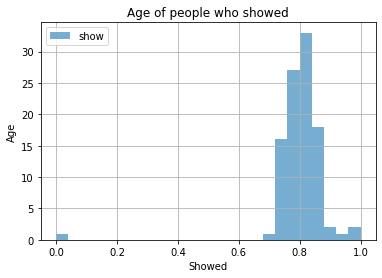

In [88]:
# using group by function to find relations between features 
# visualize the average of people who came + print the percentage

df.groupby('age')['showed'].mean().hist(alpha=0.6,bins=25,label='show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend()

<a id='conclusions'></a>
## Conclusions

##### The most important findings are:<br>
-Scheduling visits started on 2015-11-10 and ended on 2016-06-08.<br>
-Visit appointments started on 2016-04-29 and ended on 2016-06-08.<br>
-10 days on average patients awaited for an appointment. 50% of patients waited up to 4 days and 75% up to 15 days for an appointment. The longest awaiting time was 179 days.<br>
-Almost 39k patients scheduled their visit for the same day.<br>
-Out of all patients scheduling an appointment for the same day (in total 38561), 1792 of patients did not show up (5%).<br>
-There are many very young people in the dataset (most of them of age 0) but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.<br>
-The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.<br>
-Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.<br>
-Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%.<br>
-There are patients with multiple appoinpments.
### Limitations

Check for missing values, identify them, and assess their impact on the overall analysis.<br>
Make sure data type (integers, decimal values, or characters, and so forth) is correct.<br>
Check for any duplicates in the data.<br>
Check for any inconsistencies and/or errors existing in the data.
